In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Initialize variables
theta = np.array([0.2, -1, 0.9, 0.7, -0.2])
noise_sigma = np.sqrt(0.05)
N_train = 500
N_test = 20
a = 1
b = 1
a_old = np.inf
b_old = np.inf
i = 1
max_i = 1000
K = 5
e = 0.00001
sigma_y = np.empty([N_test])

In [3]:
# Create train and test data
x_train = np.random.uniform(0, 2, N_train)
X_train = np.column_stack((np.ones(N_train), x_train, x_train**2, x_train**3, x_train**5))
noise = np.random.normal(0, noise_sigma, N_train)
Y_train = np.dot(X_train, theta) + noise
x_test = np.random.uniform(0, 2, N_test)
X_test = np.column_stack((np.ones(N_test), x_test, x_test**2, x_test**3, x_test**5))


In [4]:
# Apply the algorithm
while ((abs(b - b_old) > e) or (abs(a - a_old) > e)) and (i < max_i):
    a_old = a
    b_old = b

    # E-step
    S = np.linalg.inv( (a*np.eye(5)) + (b*np.dot(X_train.T, X_train)) )
    mean = np.linalg.multi_dot([b*S, X_train.T, Y_train])
    A = np.linalg.norm(mean)**2 + np.trace(S)
    B = np.linalg.norm(Y_train-np.dot(X_train, mean))**2+np.trace(np.linalg.multi_dot([X_train, S, X_train.T]))
    
    # M-step
    b = N_train/B
    a = K/A
    i += 1

In [5]:
# Calculate the estimates for the sigma's of theta and noise
sigma_theta = 1/a
sigma_eta = 1/b
print('sigma_theta : ', sigma_theta, ' sigma_eta : ', sigma_eta)


sigma_theta :  0.3577093433601732  sigma_eta :  0.04807707635410696


In [6]:
# Calculate y estimates
y_hat = np.dot(X_test, mean)


In [7]:
# Calculate sigmas for the above estimations
inverse = np.linalg.inv(sigma_eta*np.eye(5)+sigma_theta*np.dot(X_test.T, X_test))
for j in range(0,20):
    sigma_y[j] = np.sqrt(sigma_eta+sigma_eta*sigma_theta*np.linalg.multi_dot([X_test[j,:], inverse, X_test[j,:].T]))


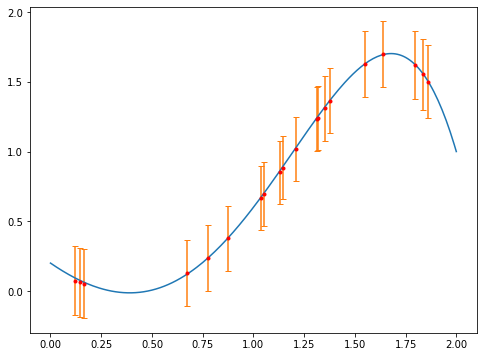

In [8]:
# Plot results
x = np.arange(0, 2.01, 0.01)
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(x, theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3 + theta[4]*x**5)
plt.errorbar(x_test, y_hat, yerr=sigma_y, linestyle='None', capsize=3)
plt.plot(x_test, y_hat, 'r.')
plt.show()